In [69]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [70]:
sns.set_theme(style="whitegrid")
#path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow", "2050example")
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow" )
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_load = os.path.join(path_to_results, "amiris-config", "data","load.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
path_to_electricity_prices = os.path.join(path_to_results, "output","raw","EnergyExchangeMulti.csv" )
path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "AMIRIS")
path_to_storages_raw = os.path.join(path_to_results, "output","raw","StorageTrader.csv")

#-----------------------------------------------------------------------------
elec_prices_data = pd.read_csv(path_to_electricity_prices, sep=";")  
generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
load_data = pd.read_csv(path_to_load, sep=";", header=None) 
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
electrolysers_data = pd.read_excel(path_to_structure, sheet_name='electrolysers', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)
storages_raw = pd.read_csv(path_to_storages_raw, sep=";") 

# Why is the electrolysis_hydrogen_generation given in the load generation? I think that value is not needed. 

In [71]:
conventionals_join = pd.merge(conventionals_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
storages_results = pd.merge(storages_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
electrolysers_results = pd.merge(electrolysers_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
electrolysers_results.head()

,identifier,ElectrolyserType,PeakConsumptionInMW,ConversionFactor,HydrogenProductionTargetInMWH,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,99992600123,ELECTROLYSIS,30000,0.74,10000000,7.714050e+10,7.800602e+09,1.621747e+08,NaN,-6.933990e+10


In [72]:
generation_data.head()

,res,conventionals,storages_discharging,storages_charging,storages_aggregated_level,load_shedding,electrolysis_power_consumption,electrolysis_hydrogen_generation
0,69230.813,0.0,0.0,0.0,0.0,0.0,18680.0,13823.2
1,69139.813,0.0,0.0,0.0,0.0,0.0,18680.0,13823.2
2,68879.313,0.0,0.0,0.0,0.0,0.0,18680.0,13823.2
3,68612.813,0.0,0.0,0.0,0.0,0.0,18680.0,13823.2
4,68359.313,0.0,0.0,0.0,0.0,0.0,18680.0,13823.2


<AxesSubplot:>

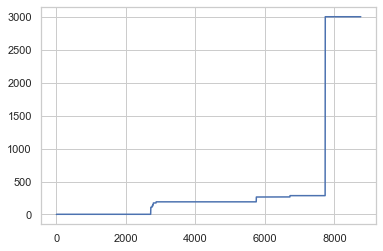

In [73]:
sorted_elec_prices = elec_prices_data["ElectricityPriceInEURperMWH"].copy()
#sorted_elec_prices.plot()
sorted_elec_prices.sort_values(ignore_index=True).plot()

In [74]:
elec_prices_data.head()

,AgentId,TimeStep,TotalAwardedPowerInMW,ElectricityPriceInEURperMWH,DispatchSystemCostInEUR
0,1,946080003,69230.813,3.0,172426.96996
1,1,946083603,69139.813,3.0,169675.92996
2,1,946087203,68879.313,3.0,165872.42996
3,1,946090803,68612.813,3.0,161688.28996
4,1,946094403,68359.313,3.0,158389.30996


In [75]:
storage_levels_data.head()
storages_results["InstalledPowerInMW"].sum()

11500

In [76]:
electrolysers_results

,identifier,ElectrolyserType,PeakConsumptionInMW,ConversionFactor,HydrogenProductionTargetInMWH,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,99992600123,ELECTROLYSIS,30000,0.74,10000000,7.714050e+10,7.800602e+09,1.621747e+08,NaN,-6.933990e+10


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='index', ylabel='value'>

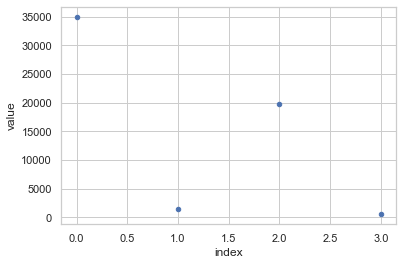

In [77]:
#storage_levels_data["value"][1:].plot.scatter() # 
storage_levels_data.reset_index().plot.scatter(x = 'index', y = 'value')

In [78]:
production = storages_results['PRODUCTION_IN_MWH'].sum()
discharging = generation_data["storages_discharging"].sum()
charging = generation_data["storages_charging"].sum()
print("production/discharging "+ str(production/discharging) )
discharging/charging

production/discharging 0.9999999999999997


0.8197251237433535

In [79]:
load_generation = pd.concat([generation_data, 
                      load_data],   axis=1 )
load_generation.drop(0, axis=1, inplace=True) # dropping timeseries
load_generation.rename(columns={1: "load" }, inplace=True)
# load_generation.sort_values(by=1, inplace=True) # sorting by increasing load
# load_generation.reset_index(inplace=True )
#load_generation.drop("index", axis=1, inplace=True)
load_generation.drop("electrolysis_hydrogen_generation", axis=1, inplace=True)
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,storages_aggregated_level,load_shedding,electrolysis_power_consumption,load
0,69230.813,0.0,0.0,0.0,0.0,0.0,18680.0,50550.813
1,69139.813,0.0,0.0,0.0,0.0,0.0,18680.0,50459.813
2,68879.313,0.0,0.0,0.0,0.0,0.0,18680.0,50199.313
3,68612.813,0.0,0.0,0.0,0.0,0.0,18680.0,49932.813
4,68359.313,0.0,0.0,0.0,0.0,0.0,18680.0,49679.313


In [80]:
load_generation["storages_charging"] = load_generation["storages_charging"]*-1
load_generation["electrolysis_power_consumption"] = load_generation["electrolysis_power_consumption"]*-1
load_generation.drop("storages_aggregated_level", axis=1, inplace=True)

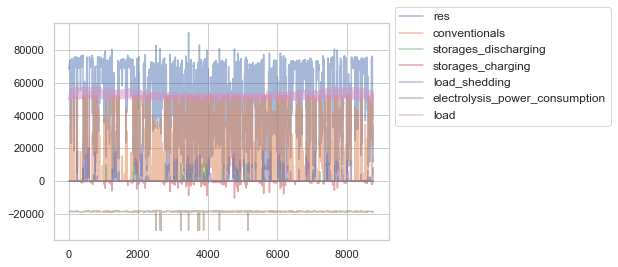

In [81]:
load_generation.plot(alpha=0.5)
axs1= plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'testing.png', bbox_inches='tight', dpi=300)

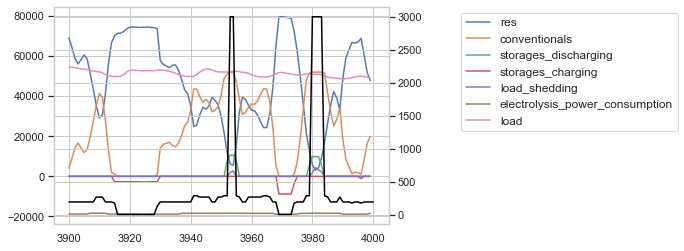

In [82]:
ElectricityPriceInEURperMWH = elec_prices_data["ElectricityPriceInEURperMWH" ]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
load_generation.iloc[3900:4000,0:7].plot( ax=ax1, alpha=0.95)
#ax1.plot(load_generation.iloc[8740:8760,0:5] , alpha=0.95)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[3900:4000] , color = "black")



In [83]:
# plt.stackplot( load_generation.index, load_generation.res, load_generation.conventionals, load_generation.load_shedding, load_generation.storages_discharging,
#               load_generation.storages_discharging,  labels=['RES', 'conventional', "load shedding", "dish", "charg"]  )


In [84]:
load_generation

,res,conventionals,storages_discharging,storages_charging,load_shedding,electrolysis_power_consumption,load
0,69230.81300,0.00000,0.0,-0.0,0.00000,-18680.0,50550.813
1,69139.81300,0.00000,0.0,-0.0,0.00000,-18680.0,50459.813
2,68879.31300,0.00000,0.0,-0.0,0.00000,-18680.0,50199.313
3,68612.81300,0.00000,0.0,-0.0,0.00000,-18680.0,49932.813
4,68359.31300,0.00000,0.0,-0.0,0.00000,-18680.0,49679.313
...,...,...,...,...,...,...,...
8755,12717.28968,51934.73101,0.0,-0.0,6561.29231,-18430.0,52783.313
8756,11990.70968,51934.73101,0.0,-0.0,6569.87231,-18430.0,52065.313
8757,11728.36968,51934.73101,0.0,-0.0,6097.21231,-18430.0,51330.313
8758,12552.46968,51934.73101,0.0,-0.0,4850.11231,-18430.0,50907.313


In [85]:
# this only work when there is one battery
# storages_bids_discharge = storages_raw["OfferedDischargePriceInEURperMWH"].dropna()
# storages_bids_discharge.reset_index(drop=True, inplace = True)
# storages_bids_charge = storages_raw["OfferedChargePriceInEURperMWH"].dropna()
# storages_bids_charge.reset_index(drop=True, inplace = True)
# storages_bids_charge.sort_values(ignore_index=True).plot()

# AwardedDischargePowerInMWH = storages_raw["AwardedDischargePowerInMWH"].dropna()
# AwardedDischargePowerInMWH.reset_index(drop=True, inplace = True)
# plt.scatter(x = ElectricityPriceInEURperMWH , y= AwardedDischargePowerInMWH )
# plt.legend()
# plt.xlabel("ElectricityPriceInEURperMWH")
# plt.ylabel("AwardedDischargePowerInMWH")
# plt.savefig(path_to_plots + '/' + 'DischargePowervsprices.png', bbox_inches='tight', dpi=300)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


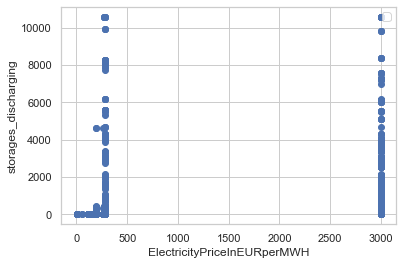

In [86]:
load_generation["storages_discharging"]
plt.scatter(x = ElectricityPriceInEURperMWH , y= load_generation["storages_discharging"] )
plt.legend()
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("storages_discharging")
plt.savefig(path_to_plots + '/' + 'BatteriesProductionvsPricesTimeseries.png', bbox_inches='tight', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


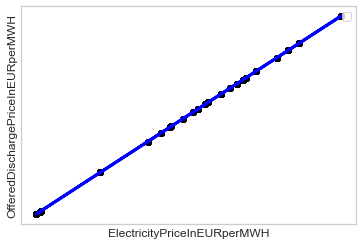

Coefficients: 
 [[1.]]


In [87]:
x = storages_bids_discharge.values.reshape(-1,1)
y = storages_bids_charge.values.reshape(-1,1)
regr = LinearRegression()
regr.fit(x, y)
fig = plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("OfferedDischargePriceInEURperMWH")
plt.legend()
plt.show()
print("Coefficients: \n", regr.coef_)

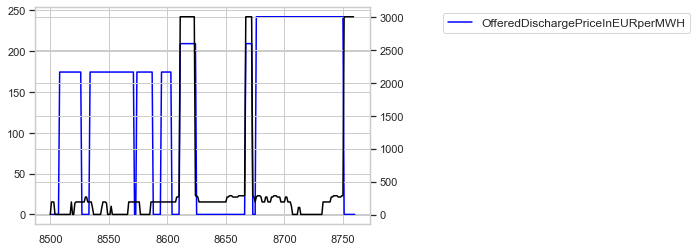

In [88]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
storages_bids_discharge.loc[8500:8760].plot( ax=ax1, color = "blue")
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[8500:8760] , color = "black")

<AxesSubplot:>

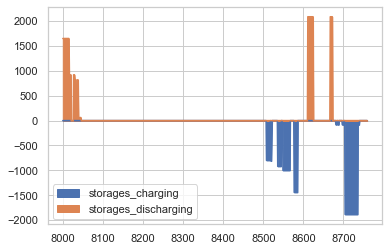

In [89]:
storages = load_generation[["storages_charging", "storages_discharging"]].copy()
storages.iloc[8000:8760,:].plot.area()


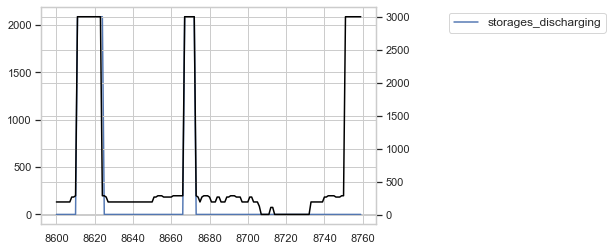

In [90]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
storages.iloc[8600:8760,1:7].plot( ax=ax1, alpha=0.95)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[8600:8760] , color = "black")

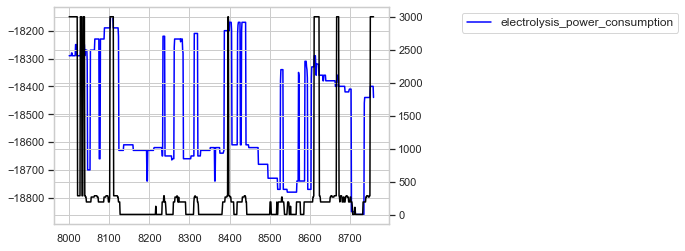

In [91]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
electrolysisPowerConsumptioninMW = electrolysisPowerConsumptioninMW*-1
electrolysisPowerConsumptioninMW.loc[8000:8760].plot( ax=ax1, color = "blue")
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[8000:8760] , color = "black")
plt.savefig(path_to_plots + '/' + 'H2vsPricesTimeseries.png', bbox_inches='tight', dpi=300)

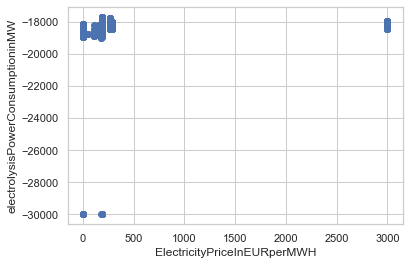

In [92]:
x = ElectricityPriceInEURperMWH.values.reshape(-1,1)
y = electrolysisPowerConsumptioninMW.values.reshape(-1,1)
fig = plt.scatter(x, y)
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("electrolysisPowerConsumptioninMW")

plt.savefig(path_to_plots + '/' + 'H2vsPrices.png', bbox_inches='tight', dpi=300)

<AxesSubplot:>

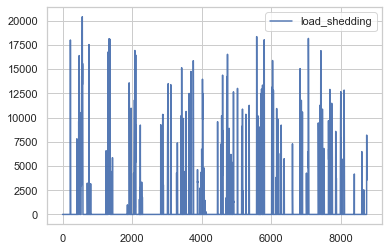

In [93]:
load_generation[["load_shedding"]].plot( alpha=0.95)

In [94]:
conventionals_join
#conventionals_join.loc[conventionals_join['FuelType'] =="HYDROGEN"]

,identifier,FuelType,OpexVarInEURperMWH,Efficiency,BlockSizeInMW,InstalledPowerInMW,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,20360200022,WASTE,1.9,0.300000,1.76800,1.76800,1.692106e+06,7.413325e+06,NaN,1.056026e+04,5.721219e+06
1,99990100004,BIOMASS,2.0,0.309000,200.00000,200.00000,1.766071e+08,8.388623e+08,NaN,1.196273e+06,6.622551e+08
2,99993500010,NATURAL_GAS,2.7,0.610000,300.00000,300.00000,3.105535e+08,1.254061e+09,NaN,1.769801e+06,9.435074e+08
3,99993300008,NATURAL_GAS,1.5,0.400000,300.00000,300.00000,2.379437e+08,1.086501e+09,NaN,8.979687e+05,8.485573e+08
4,99993400009,NATURAL_GAS,2.7,0.850000,300.00000,300.00000,2.280998e+08,1.259113e+09,NaN,1.800448e+06,1.031013e+09
5,20250100021,BIOMASS,2.0,0.420000,631.00000,631.00000,4.153734e+08,2.650505e+09,NaN,3.805777e+06,2.235132e+09
6,20111700025,NATURAL_GAS,5.0,0.375326,4000.00000,4000.00000,2.104405e+09,1.324348e+10,NaN,7.363174e+06,1.113907e+10
7,20091700032,NATURAL_GAS,5.0,0.375326,5700.00000,5700.00000,2.188731e+09,1.806191e+10,NaN,7.658225e+06,1.587318e+10
8,20310400024,NATURAL_GAS,4.2,0.402023,8501.96301,8501.96301,5.634408e+09,2.964769e+10,NaN,2.115381e+07,2.401328e+10
9,20390300031,NATURAL_GAS,4.0,0.561081,15000.00000,15000.00000,1.542753e+10,6.115668e+10,NaN,8.041983e+07,4.572916e+10


In [95]:
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
conventional_production_from_generation = load_generation["conventionals"].sum()
a = conventional_production - conventional_production_from_generation

In [96]:
storages_data.head()

,identifier,StorageType,EnergyToPowerRatio,ChargingEfficiency,DischargingEfficiency,InitialEnergyLevelInMWH,InstalledPowerInMW
0,99992600006,STORAGE,5,0.92,0.92,0,100
1,20502600030,STORAGE,5,0.92,0.92,0,300
2,20502600037,STORAGE,5,0.92,0.92,0,4000
3,20482600036,STORAGE,5,0.92,0.92,0,7100


In [97]:
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
charging_from_generation = load_generation["storages_discharging"].sum()